In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/predictiveAnalysis/Assignment5_SVM\Book2.csv")

In [3]:
df.shape

(4999, 55)

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type.31,Soil_Type.32,Soil_Type.33,Soil_Type.34,Soil_Type.35,Soil_Type.36,Soil_Type.37,Soil_Type.38,Soil_Type.39,CoverType
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
print(df.CoverType.value_counts())

4    1249
2     947
5     945
3     643
1     557
6     479
7     179
Name: CoverType, dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [8]:
max_acc = 0
acc_list = []
param_list = []
for i in range(10):
    sample_df = df.sample(frac=0.30, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('CoverType', axis=1), sample_df.CoverType, test_size=0.3, random_state=42, stratify=sample_df.CoverType)
    x_train = StandardScaler().fit_transform(x_train)
    param_grid = { 
                'C':[0.1, 0.5, 1, 2,3],
                'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
                'degree':[1, 2, 3, 4],
                'gamma': [1, 0.1, 0.01, 0.001,0.001]
                }
    
    grid = GridSearchCV(SVC(max_iter=1000), param_grid)
    grid.fit(x_train, y_train)  
    y_pred = grid.predict(x_test)
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred))) 
    
    acc_list.append(accuracy_score(y_test, y_pred))
    param_list.append(grid.best_params_)
    
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df

{'C': 2, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Sample 1
Accuracy: 0.11333333333333333

{'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Sample 2
Accuracy: 0.11333333333333333

{'C': 3, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Sample 3
Accuracy: 0.12

{'C': 2, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 4
Accuracy: 0.04

{'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Sample 5
Accuracy: 0.08888888888888889

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 6
Accuracy: 0.19777777777777777

{'C': 0.5, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Sample 7
Accuracy: 0.14888888888888888

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 8
Accuracy: 0.19111111111111112

{'C': 0.5, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Sample 9
Accuracy: 0.06666666666666667

{'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Sample 10
Accuracy: 0.08



In [11]:
final_df = pd.DataFrame(data=[acc_list, param_list], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.113333,"{'C': 2, 'degree': 2, 'gamma': 0.1, 'kernel': ..."
1,0.113333,"{'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': ..."
2,0.12,"{'C': 3, 'degree': 3, 'gamma': 0.1, 'kernel': ..."
3,0.04,"{'C': 2, 'degree': 1, 'gamma': 1, 'kernel': 'p..."
4,0.088889,"{'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': ..."
5,0.197778,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
6,0.148889,"{'C': 0.5, 'degree': 2, 'gamma': 0.1, 'kernel'..."
7,0.191111,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
8,0.066667,"{'C': 0.5, 'degree': 2, 'gamma': 0.1, 'kernel'..."
9,0.08,"{'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': ..."


In [12]:
print(max_acc)
print(best_params)
print(best_model)
best_sample_df.head()

0.19777777777777777
{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=3, degree=1, gamma=0.1, max_iter=1000)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type.31,Soil_Type.32,Soil_Type.33,Soil_Type.34,Soil_Type.35,Soil_Type.36,Soil_Type.37,Soil_Type.38,Soil_Type.39,CoverType
504,2646,9,33,60,9,1771,165,156,112,1518,...,0,0,0,0,0,0,0,0,0,2
3760,2192,36,31,108,67,1173,202,158,73,1057,...,0,0,0,0,0,0,0,0,0,3
1823,2885,61,27,384,103,1243,231,174,60,2100,...,0,1,0,0,0,0,0,0,0,2
3913,2299,91,12,283,141,1445,238,221,111,875,...,0,0,0,0,0,0,0,0,0,4
1273,3140,255,14,162,23,5678,187,248,199,2794,...,0,0,0,0,0,0,0,0,0,2


In [13]:
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('CoverType', axis=1), best_sample_df.CoverType, test_size=0.3, random_state=42, stratify=best_sample_df.CoverType)
x_train = StandardScaler().fit_transform(x_train)

for i in range(1000):
    x = i+1
    svm = SVC(C=3, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [14]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

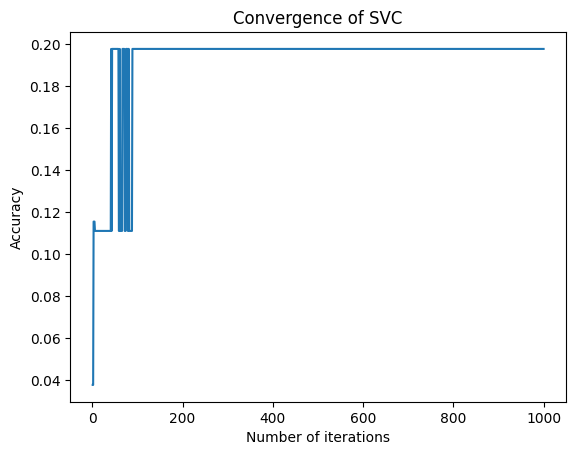

In [15]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()